# Example of running the spatial m-v2RDM

In [1]:
import numpy as np
from src.molecule_helper import create_molecule, get_spatial_D2, get_fci_curve
from src.measurements import generate_measurement
from src.spatial_mv2RDM import run_sdp
import matplotlib.pyplot as plt

In [2]:
# Setup MOSEK license path (add your personal license to the repo)
# import os
# import mosek
# license_path = os.getcwd().split('spatial-mv2RDM')[0] + 'spatial-mv2RDM/.mosek.lic'
# mosek.Env(globalenv=True, licensefile=license_path)

## Hydrogen

In [4]:
xfci, fci = get_fci_curve('hydrogen')
xs = np.linspace(0.25, 2.5, 10)
energies = []

for x in xs:
    mol_x = create_molecule('hydrogen', x)
    r = mol_x.n_orbitals
    result = run_sdp(mol_x, conditions='DQG')
    energies.append(result['primal'])

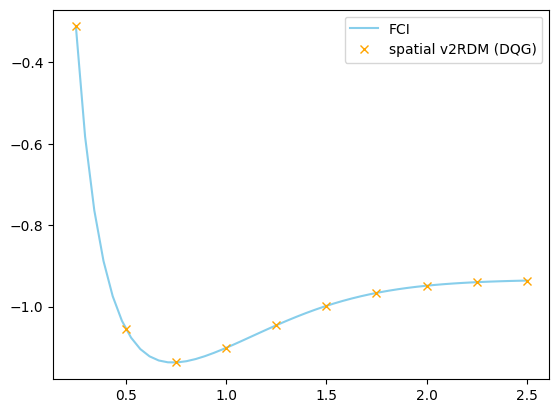

In [5]:
# plot
plt.plot(xfci, fci, '-', color='skyblue', label='FCI')
plt.plot(xs, energies, 'x', color='orange', label='spatial v2RDM (DQG)')
plt.legend(['FCI', 'spatial v2RDM (DQG)'])

## Hydrogen Chain (with measurements)

In [7]:
# Create molecule
molecule = create_molecule('hydrogen_chain', 1.0)

# Gather measurements
r = molecule.n_orbitals
n_measurements = 10
D2fci = get_spatial_D2(molecule)
measurements = [generate_measurement(D2fci, r) for _ in range(n_measurements)]

# Run SDP
result = run_sdp(molecule, conditions='DQ', measurements=measurements)

# Output
print('FCI energy:', molecule.fci_energy)
print('SDP Result:', result['primal'])

FCI energy: -2.1663874486347607
SDP Result: -2.1667561910794975
